In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
file_path = '/Users/user/Downloads/online_retail_II.xlsx'
df = pd.read_excel(file_path)

In [135]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'TotalPrice', 'InvoiceDate', 'Cost',
       'Profit'],
      dtype='object')

In [70]:
# Display the first few rows of the dataframe to understand what the data looks like
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [71]:
# Basic info about the dataset to understand data types and missing values
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [72]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


In [73]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [133]:
# Check for duplicates
print("Number of duplicate entries:", df.duplicated().sum())

# Remove duplicates if needed
df = df.drop_duplicates()

# Checking for outliers in TotalPrice
q1 = df['TotalPrice'].quantile(0.25)
q3 = df['TotalPrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Display outliers
outliers = df[(df['TotalPrice'] < lower_bound) | (df['TotalPrice'] > upper_bound)]
print("Outliers in TotalPrice:\n", outliers)

Number of duplicate entries: 0
Outliers in TotalPrice:
             Invoice StockCode                         Description  Quantity  \
InvoiceDate                                                                   
2049-01-01   490101     21217          RED SPOTTY ROUND CAKE TINS        10   
2049-01-08   490108     15036           ASSORTED COLOURS SILK FAN       240   
2049-01-08   490108     35160      BUDDHA INCENSE HOLDER ASSORTED       144   
2049-01-09   490109     22112          CHOCOLATE HOT WATER BOTTLE         9   
2049-01-09   490109    85123A  WHITE HANGING HEART T-LIGHT HOLDER        18   
...             ...       ...                                 ...       ...   
2053-12-07   531207    72760B   VINTAGE CREAM 3 BASKET CAKE STAND         6   
2053-12-14   531214    85123A  WHITE HANGING HEART T-LIGHT HOLDER       128   
2053-12-14   531214    85099F                JUMBO BAG STRAWBERRY       100   
2053-12-14   531214     21937             STRAWBERRY   PICNIC BAG        50

In [74]:
#Data preprocessing steps
# Handling missing values - for simplicity, let's drop rows with any missing values.
# You might want to handle this differently depending on your analysis needs.
df = df.dropna()

# Convert the InvoiceDate from object type to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Adding a new column for total price
df['TotalPrice'] = df['Quantity'] * df['Price']

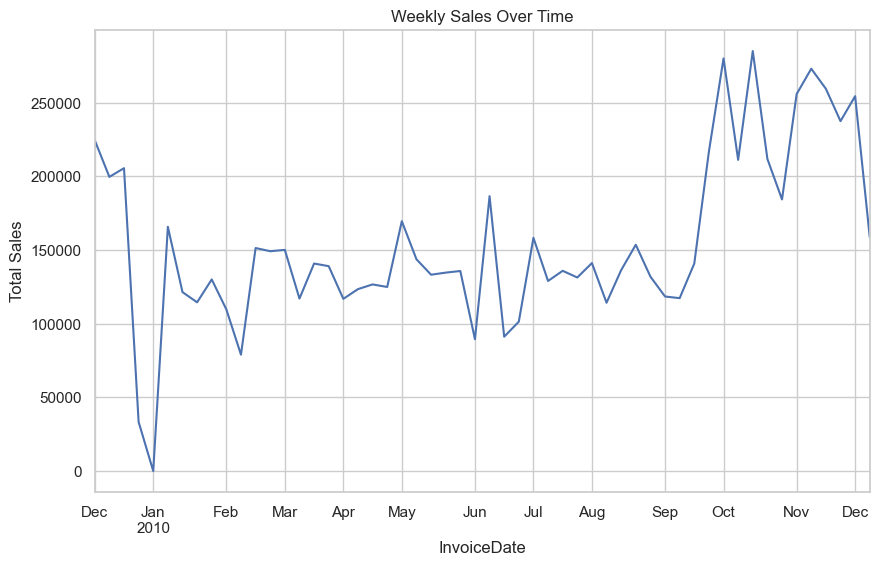

In [75]:
# Data visualization
# Let's plot the number of transactions over time
plt.figure(figsize=(10, 6))
df.set_index('InvoiceDate')['TotalPrice'].resample('W').sum().plot()
plt.title('Weekly Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


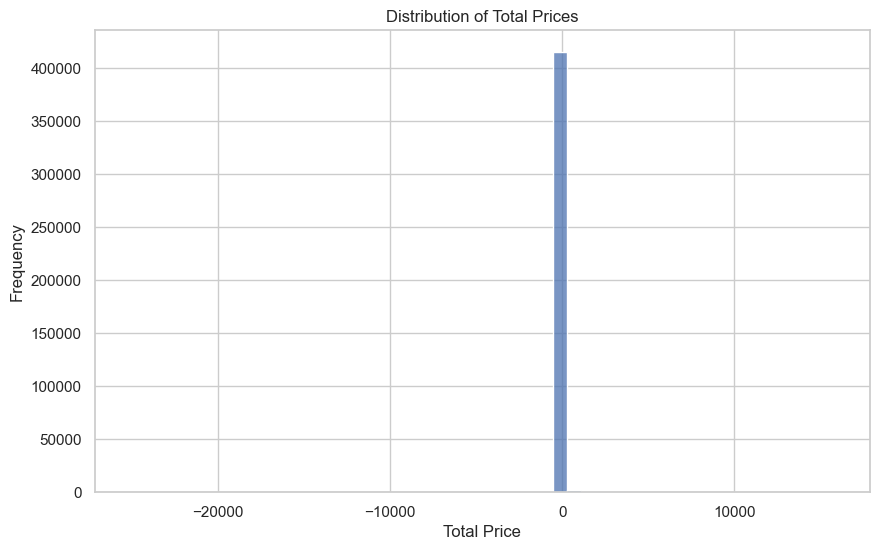

In [76]:
# Plotting a histogram of the total prices to understand the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=50, kde=False)
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

/var/folders/_w/5h6h3nfj4lbft360lpfrxft80000gn/T/ipykernel_52150/88355895.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['Invoice'], errors='coerce')


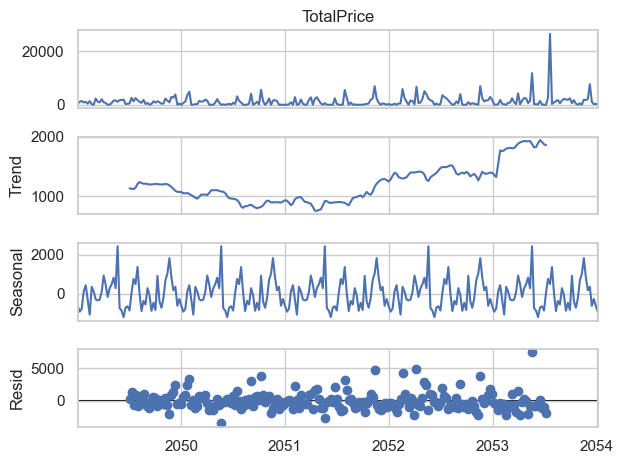

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure no leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Check if all entries in 'Invoice' can be converted to dates, filter if not
# Assuming non-date entries are identifiable by not containing a typical date delimiter like '/'
is_date = df['Invoice'].str.contains('/')
df = df[is_date]

# Convert 'Invoice' to datetime
df['Invoice'] = pd.to_datetime(df['Invoice'], errors='coerce')  # errors='coerce' will convert unparseable data to NaT

# Drop rows where dates could not be parsed
df.dropna(subset=['Invoice'], inplace=True)

# Set 'Invoice' as the index
df.set_index('Invoice', inplace=True)

# Calculate total weekly sales
weekly_sales = df['TotalPrice'].resample('W').sum()

# Decompose the time series
result = seasonal_decompose(weekly_sales, model='additive')  # or use model='multiplicative' if it fits better

# Plot the decomposed components
result.plot()
plt.show()


In [105]:
import pandas as pd

# Ensure the 'Invoice' column is converted to datetime format
df['InvoiceDate'] = pd.to_datetime(df['Invoice'], errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)  # Drop rows where datetime conversion failed

# Calculate Monetary
monetary = df.groupby('Customer ID')['TotalPrice'].sum()

# Calculate Frequency
frequency = df.groupby('Customer ID')['Invoice'].nunique()

# Calculate Recency
# Assume we have a 'current_date' that represents the current day in the context of the analysis
current_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # One day after the last transaction
recency = df.groupby('Customer ID')['InvoiceDate'].max()
recency = current_date - recency
recency = recency.dt.days  # Convert 'Timedelta' to integer days

# Create the RFM table
rfm_table = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

print(rfm_table)


             Recency  Frequency  Monetary
Customer ID                              
12358.0          732          1    268.10
12406.0           81          1   1345.86
12413.0          295          1    241.35
12414.0          399          1    130.00
12431.0          392          1    127.00
...              ...        ...       ...
18251.0         1214          1   2655.96
18253.0         1373          1    317.88
18258.0          450          1    343.42
18259.0          100          1    486.40
18272.0         1446          1    635.00

[543 rows x 3 columns]


/var/folders/_w/5h6h3nfj4lbft360lpfrxft80000gn/T/ipykernel_52150/3408678119.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['Invoice'], errors='coerce')


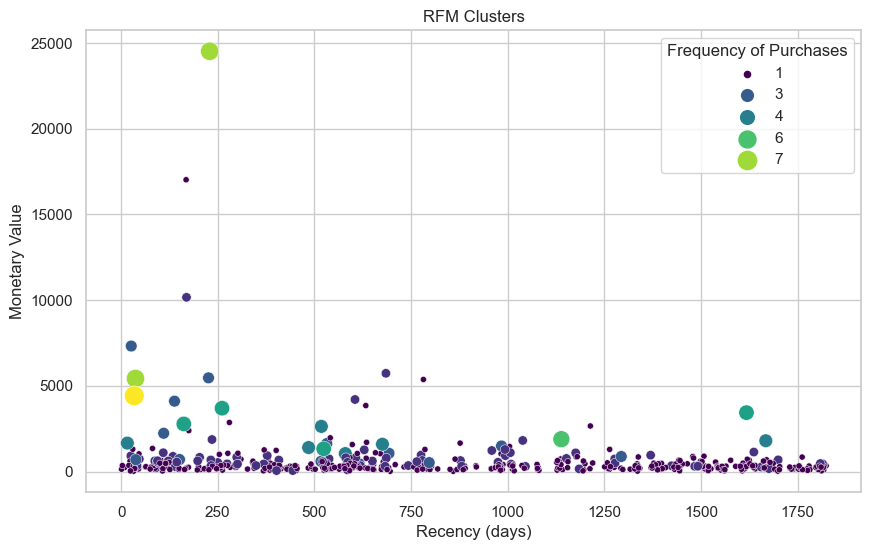

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rfm_table' is your DataFrame and it already contains all rows
# Ensure your DataFrame is named 'rfm_table' and it has the columns 'Recency', 'Frequency', 'Monetary'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_table, x='Recency', y='Monetary', size='Frequency', hue='Frequency', palette='viridis', sizes=(20, 200))
plt.title('RFM Clusters')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.legend(title='Frequency of Purchases')
plt.grid(True)
plt.show()


In [137]:
# Assuming a hypothetical cost per unit (say, 60% of the price)
df['Cost'] = df['Price'] * 0.6 * df['Quantity']
df['Profit'] = df['TotalPrice'] - df['Cost']

# Aggregate data for profitability analysis
profitability = df.groupby('Customer ID').agg(Total_Sales=('TotalPrice', 'sum'),
                                              Total_Cost=('Cost', 'sum'),
                                              Total_Profit=('Profit', 'sum')).reset_index()

# Calculate Profit Margin for each customer
profitability['Profit_Margin'] = profitability['Total_Profit'] / profitability['Total_Sales']

# Display top 10 profitable customers
top_profitable_customers = profitability.sort_values(by='Total_Profit', ascending=False).head(10)
print(top_profitable_customers)

     Customer ID  Total_Sales  Total_Cost  Total_Profit  Profit_Margin
197      14646.0     24520.38   14712.228      9808.152            0.4
300      15838.0     17022.24   10213.344      6808.896            0.4
379      16754.0     10162.72    6097.632      4065.088            0.4
446      17389.0      7320.18    4392.108      2928.072            0.4
221      14895.0      5730.04    3438.024      2292.016            0.4
457      17511.0      5464.08    3278.448      2185.632            0.4
224      14911.0      5426.94    3256.164      2170.776            0.4
368      16684.0      5368.86    3221.316      2147.544            0.4
256      15311.0      4415.49    2649.294      1766.196            0.4
523      18102.0      4201.00    2520.600      1680.400            0.4


ADF Statistic: -14.791564
p-value: 0.000000
                               SARIMAX Results                                
Dep. Variable:             TotalPrice   No. Observations:                  261
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2422.067
Date:                Sat, 15 Feb 2025   AIC                           4850.133
Time:                        18:16:03   BIC                           4860.815
Sample:                    01-10-2049   HQIC                          4854.428
                         - 01-04-2054                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4289      0.014    -29.639      0.000      -0.457      -0.401
ma.L1         -1.0000      0.021    -48.577      0.000      -1.040      -0.960
sigma2  

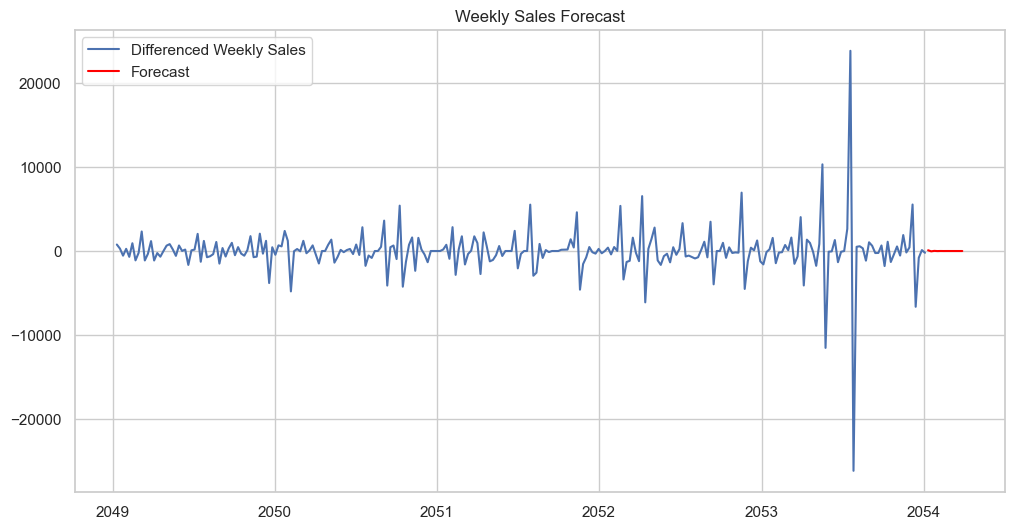

In [139]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

# Aggregate sales data weekly
weekly_sales = df['TotalPrice'].resample('W').sum()

# Check if stationary, then differencing if needed
from statsmodels.tsa.stattools import adfuller
result = adfuller(weekly_sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If not stationary, difference the series
weekly_sales_diff = weekly_sales.diff().dropna()

# Fit ARIMA model
model = ARIMA(weekly_sales_diff, order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=12)  # Forecast the next 12 periods

# Plot
plt.figure(figsize=(12,6))
plt.plot(weekly_sales_diff, label='Differenced Weekly Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Weekly Sales Forecast')
plt.legend()
plt.show()
